In [91]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.stats as ss # statistical functions
import matplotlib.pyplot as plt # plotting
import seaborn as sns # pretty plots
import math
import warnings

from collections import Counter
from sklearn.model_selection import train_test_split # data splitting

import tensorflow as tf  # building NN model
from tensorflow.keras.layers.experimental import preprocessing # input preprocessing

# model evaluation metrics
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score,confusion_matrix

warnings.filterwarnings('ignore')

In [92]:
data = pd.read_csv("HR-Employee-Attrition.csv")

In [93]:
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [94]:
data.size

51450

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [96]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [97]:
data.duplicated(subset = None, keep = 'first')

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [98]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [99]:
data.MonthlyIncome.agg(['min','max', 'count', 'mean', 'median', 'std'])

min        1009.000000
max       19999.000000
count      1470.000000
mean       6502.931293
median     4919.000000
std        4707.956783
Name: MonthlyIncome, dtype: float64

In [100]:
# Change the catigorical data.

In [101]:
data.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [102]:
data.Department.replace({"Sales":0,"Research & Development":1,"Human Resources":2},inplace = True)

In [103]:
data.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [104]:
data.BusinessTravel.replace({"Travel_Rarely":0, "Travel_Frequently":1, "Non_Travel":2},inplace = True)

In [105]:
data.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [106]:
data.Attrition.replace({"Yes":0, "No":1},inplace = True)

In [107]:
data.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [108]:
data.EducationField.replace({"Life Sciences":0, "Other":1, "Medical":2, "Marketing":3, "Technical Degree":4, "Human Resources":5}, inplace = True)

In [109]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [110]:
data.Gender.replace({"Feamale":0, "Male":1}, inplace = True)

In [111]:
data.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [112]:
data.MaritalStatus.replace({"Single":0, "Married":1, "Divorced":2}, inplace = True)

In [113]:
data.OverTime.unique()

array(['Yes', 'No'], dtype=object)

In [114]:
data.OverTime.replace({"Yes":0, "No":1}, inplace = True)

In [115]:
# drop the unnecessary columns

In [116]:
# Restrict the daily rate between three levels

In [117]:
#data['bucket']= pd.cut(data['DailyRate'],3,labels=['low','med','high'])

In [118]:
# Data visiualaization 

Text(0, 0.5, 'Bins')

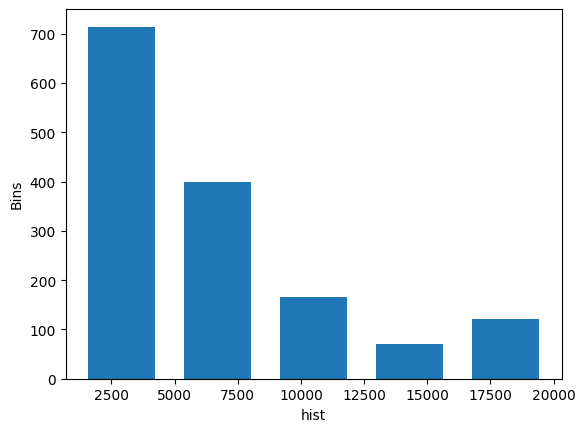

In [119]:
hist = data.MonthlyIncome
bins = 5
plt.hist(hist,bins,histtype='bar',rwidth=0.7)
plt.xlabel('hist')
plt.ylabel('Bins')

In [ ]:
activity = data.Gender.unique()
slices = [1,2]
color  = ['r','b']
plt.pie(slices,labels=activity,colors=color,shadow=True,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x1920cb9f4c0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Female'),
  Text(-0.5499998810780428, -0.9526280128224968, '1')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33%'),
  Text(-0.29999993513347784, -0.5196152797213618, '66.67%')])

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

In [ ]:
data.fillna(value='', inplace=True)

In [ ]:
data.head(10)

In [ ]:
data.drop(columns={"StandardHours","EducationField","EmployeeCount","Gender",
                "MaritalStatus","Over18",
                 "OverTime","Department","BusinessTravel","JobRole"}, axis=1, inplace=True)

In [ ]:
data.drop(columns={"Education","JobLevel","TrainingTimesLastYear","YearsSinceLastPromotion"}, axis=1, inplace=True)

In [ ]:
data.head(10)

In [ ]:
X = data.drop(['Attrition'], axis = 1)
y = data['Attrition']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.34, random_state = 0)

In [ ]:
data.head(10)

In [ ]:
#feature extraction
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

In [ ]:
#plot graph of feature importances for better visualization 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
model = Sequential()

# input layer
model.add(Input(shape=(20,)))

# hidden layers
model.add(Dense(80,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(160,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(160,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(80,activation='relu'))







# output layer
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test.values),steps_per_epoch=12,epochs=5)

In [ ]:
# Evaluate our model in test data
model.evaluate(X_test,y_test)

In [ ]:
from sklearn.metrics import accuracy_score 


y_pred_test = model.predict(X_test)
y_pred_test=y_pred_test>0.5

y_pred_train = model.predict(X_train)
y_pred_train=y_pred_train>0.5

print("Accuracy on Train Set ==> ",accuracy_score(y_train,y_pred_train))
print("Accuracy on Test Set ==> ",accuracy_score(y_test,y_pred_test))

In [ ]:
y_predicted = [1 if y >= 0.5 else 0 for y in model.predict(X_test).flatten()]
y_predicted[:5]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix_result = confusion_matrix(y_test,y_predicted)
confusion_matrix_result

In [ ]:
labels = ['yes','no']
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Reds',fmt='.0f',xticklabels=labels,yticklabels=labels)
plt.title('Attrition prediction')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

class_names=['yes','no']

print(classification_report(y_test,y_predicted, target_names=class_names))

accuracy = accuracy_score(y_test,y_predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,y_predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,y_predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,y_predicted)
print('F1 score: %f' % f1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
predDT = DT.predict(X_test)

In [ ]:
confusion_matrix_result2 = confusion_matrix(y_test,predDT)
confusion_matrix_result2

In [ ]:
labels = ['Yes','No']
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result2,annot=True,cmap='Reds',fmt='.0f',xticklabels=labels,yticklabels=labels)
plt.title('Attriton prediction')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [ ]:
class_names=['Yes','No']

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print(classification_report(y_test,predDT, target_names=class_names))

accuracy = accuracy_score(y_test,predDT)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,predDT)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,predDT)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,predDT)
print('F1 score: %f' % f1)